# Experiment: Suffix

In [2]:
import _pickle as pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [106]:
cat_sufcat = pickle.load(open('../results_dict/prob_suffcat_per_basecat_unamb','rb'))
cat_sufcat

{'ADJ': {'deadjectival': -5.1190631728132416,
  'denominal': -5.6478922120888093,
  'deverbal': -5.2763708541792216},
 'NOUN': {'deadjectival': -5.3866060344359523,
  'denominal': -5.4726460064225799,
  'deverbal': -5.0736854081205411},
 'VERB': {'deadjectival': -5.8984577124520241,
  'denominal': -6.2165913075656007,
  'deverbal': -5.1856965163278979}}

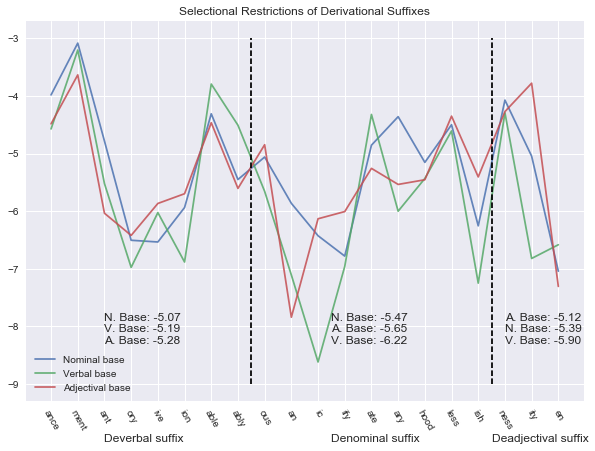

In [115]:
cat_suf = pickle.load(open('../results_dict/prob_suff_per_basecat_unamb','rb'))

fig = plt.figure(figsize=(10,7))
for cat in cat_suf.keys():
        plt.plot(range(20), [cat_suf[cat][i][j] for i in cat_suf[cat].keys() for j in cat_suf[cat][i].keys()], alpha=0.85)
plt.xticks(range(20), [k for cat in cat_suf['NOUN'].keys() for k in cat_suf['NOUN'][cat].keys() ], rotation = -60)
plt.plot((7.5, 7.5), (-9, -3), 'k--')
plt.plot((16.5, 16.5), (-9, -3), 'k--')

plt.annotate('Deverbal suffix', xy=(2, -8), xytext=(2, -10))
plt.annotate('Denominal suffix', xy=(2, -8), xytext=(10.5, -10))
plt.annotate('Deadjectival suffix', xy=(2, -8), xytext=(16.5, -10))
plt.annotate('N. Base: {:.2f}\nV. Base: {:.2f}\nA. Base: {:.2f}'.format(cat_sufcat['NOUN']['deverbal'],cat_sufcat['VERB']['deverbal'],cat_sufcat['ADJ']['deverbal']), xy=(2, -7.8), xytext=(2, -8.3))
plt.annotate('N. Base: {:.2f}\nA. Base: {:.2f}\nV. Base: {:.2f}'.format(cat_sufcat['NOUN']['denominal'],cat_sufcat['ADJ']['denominal'],cat_sufcat['VERB']['denominal']), xy=(2, -7.8), xytext=(10.5, -8.3))
plt.annotate( 'A. Base: {:.2f}\nN. Base: {:.2f}\nV. Base: {:.2f}'.format(cat_sufcat['ADJ']['deadjectival'],cat_sufcat['NOUN']['deadjectival'],cat_sufcat['VERB']['deadjectival']), xy=(2, -7.8), xytext=(17, -8.3))
plt.legend([cat for cat in ['Nominal base','Verbal base','Adjectival base']])
plt.title('Selectional Restrictions of Derivational Suffixes')
plt.show()
fig.savefig('Selectional Restrictions of Derivational Suffixes_unambiguous suffxies.png')

# Novel Combinations of Real Prefixes with a Real Base 


## With Pefix Ambiguity (same results obtained without prefix ambiguity)

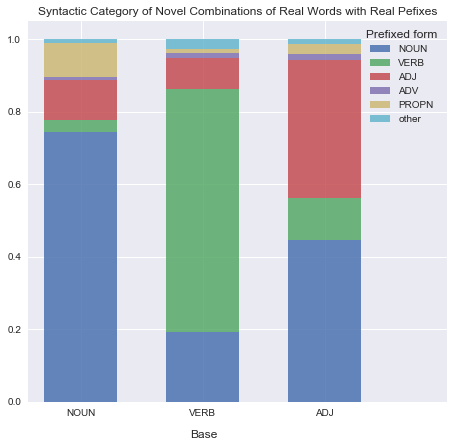

In [26]:
pref_cumm = pickle.load(open('../results_dict/results_cumm_Real_Real_unamb1_new','rb'))
pref_cumm_6cat = {i:{} for i in pref_cumm.keys()}
relevant = [b'NOUN',b'VERB',b'ADJ',b'ADV',b'PROPN']
for base_cat in pref_cumm.keys():
    for mod_cat in [b'NOUN',b'VERB',b'ADJ',b'ADV',b'PROPN']:
        pref_cumm_6cat[base_cat][mod_cat] = pref_cumm[base_cat][mod_cat]/sum(pref_cumm[base_cat].values())
new_dict = {i:[] for i in pref_cumm_6cat['NOUN'].keys()}
for item in pref_cumm_6cat.keys():
    for jtem in pref_cumm_6cat[item]:
        new_dict[jtem].append(pref_cumm_6cat[item][jtem])
fig = plt.figure(figsize=(7.5,7))
bottom_sum=[0,0,0]
for i,item in enumerate(new_dict.keys()):
    plt.bar(range(3),new_dict[item],0.6,bottom=bottom_sum, alpha=0.85)
    bottom_sum = [sum(x) for x in zip(bottom_sum, new_dict[item])]
plt.bar(range(3),[1-bottom_sum[0],1-bottom_sum[1],1-bottom_sum[2]],0.6,bottom=bottom_sum,alpha=0.85)
plt.xticks(range(4),['NOUN','VERB','ADJ',''])
plt.annotate('Base', xy=(0.5, 0.5), xytext=(0.9, -0.1))
plt.legend(['NOUN','VERB','ADJ','ADV','PROPN','other'],title = 'Prefixed form')
plt.title('Syntactic Category of Novel Combinations of Real Words with Real Pefixes')
plt.show()

## Proportion of Matching Tags per Prefix

In [62]:
softmax = pickle.load(open('../results_dict/softmax_Real_Real_unamb0','rb'))

In [63]:
averaged_ones = {i:[] for i in softmax.keys()}
for cat in softmax.keys():
    for pref in softmax[cat].keys():
        l = [list(i[0]) for i in softmax[cat][pref]]
        ls = [[0]*len(l[0]) for i in range(len(l))]
        for i in range(len(ls)):
            ls[i][l[i].index(np.max(l[i]))] =1
        averaged_ones[cat].append(np.mean(ls,axis=0))

In [28]:
prefixes = ({'NOUN':['micro','macro','vice','arch','mini','maxi','counter','pre','sub','super','hyper','hypo','ultra','post','ante','pseudo','ex','multi','meta'],
                'VERB':['re','mis','out','over','under','up','down','counter','pre','un','in'],
                'ADJ':['anti','pro','extra','in','un','pre','sub','super','hyper','hypo','ultra','post','ante','pseudo','ex','multi','meta']})

In [97]:
data = open('../data/en/raw_english.txt','r').read().split()
tags = open('../data/en/tags_english.txt','r').read().split()
t2i,p2i = {},{i:{} for i in prefixes.keys()}
bla={}
for key in prefixes.keys():
    bla[key]= np.array([[0]*len(prefixes[key])]*5)

for t in ['PROPN','ADJ','NOUN','VERB','ADV']:
    t2i[t]=len(t2i)
for key in prefixes.keys():
    for p in prefixes[key]:
        p2i[key][p]=len(p2i[key])

for word,tag in zip(data,tags):
    for key in prefixes.keys():
        for p in prefixes[key]:
            if word.startswith(p) and tag in t2i.keys():
                bla[key][t2i[tag]][p2i[key][p]]+=1
            

In [90]:
tag_vocab = pickle.load(open('../data/en/tag_vocab.bin', 'rb'))
def filter_heatmap(ls):
    return [ls[i] for i in [0,2,3,4,12]]
def draw_heatmap_pref(cat,label,unamb,x1,x2,x3,mix1,mix2,main,mix3):
    fig = plt.figure(figsize=(10,7))
          
    sns.heatmap(filter_heatmap(np.array(averaged_ones[cat]).T),xticklabels=list(softmax[cat].keys()),vmin=0,vmax=1,cmap = 'Blues',annot = bla[cat],fmt='d', annot_kws = {'fontsize':9},yticklabels = filter_heatmap([i.decode() if type(i)!=str else i for i in tag_vocab.keys()]))
    plt.title('Syntactic Category of Novel Prefixed {}'.format(label))
    plt.xticks(rotation=-60)
    plt.plot((x1, x1), (0, 6), 'k--',alpha=0.5)
    plt.plot((x2, x2), (0, 6), 'k--',alpha=0.5)
    plt.plot((x3, x3), (0, 6), 'k--',alpha=0.5)
    plt.annotate(mix1, xy=(x1, 0), xytext=(0.1, 0.1),fontsize=9)
    plt.annotate(main, xy=(x2, 0), xytext=(x1+0.1, 0.1),fontsize=9)
    plt.annotate(mix2, xy=(x3, 0), xytext=(x2+0.1, 0.1),fontsize=9)
    plt.annotate(mix3, xy=(x3, 0), xytext=(x3+0.1, 0.1),fontsize=9)
    plt.show()
    fig.savefig('../plots/Syntactic Category of Novel Prefixed {} Unambig {}.png'.format(label,unamb))

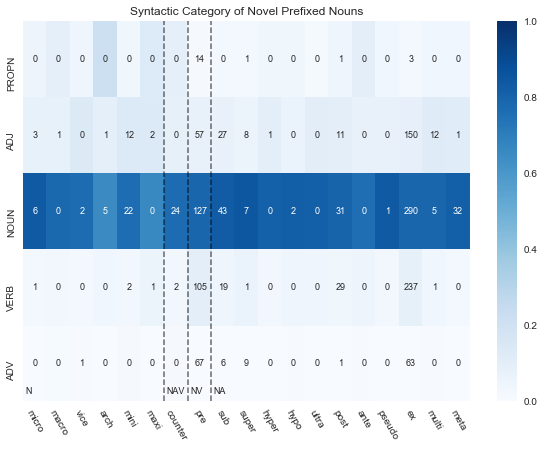

In [91]:
draw_heatmap_pref('NOUN','Nouns',0,6,7,8,'N','NV','NAV','NA')

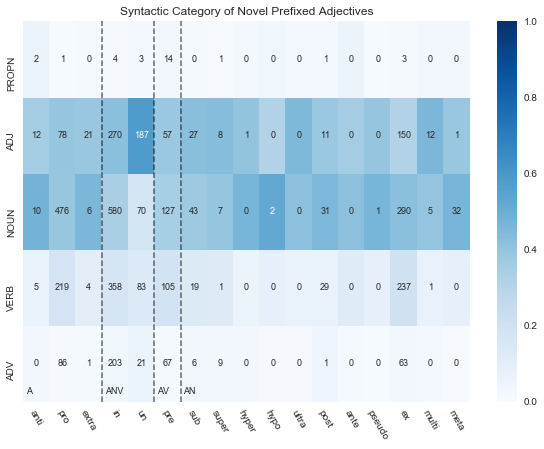

In [92]:
draw_heatmap_pref('ADJ','Adjectives',0,3,5,6,'A','AV','ANV','AN')

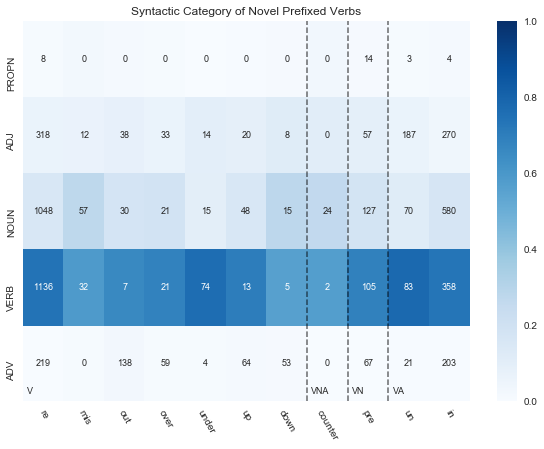

In [96]:
draw_heatmap_pref('VERB','Verbs',0,7,8,9,'V','VN','VNA','VA')

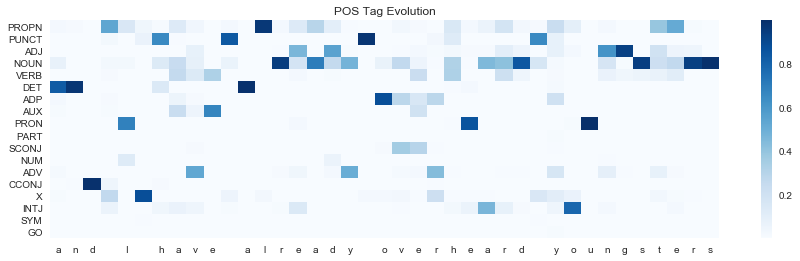

In [100]:
tag_vocab = pickle.load(open('../data/en/tag_vocab.bin', 'rb'))
tag_evolution = pickle.load(open('../results_dict/tag_evolution','rb'))
fig = plt.figure(figsize=(15,4))
sns.heatmap(np.array(tag_evolution['one']).T,xticklabels=list("and I have already overheard youngsters"),cmap = 'Blues',yticklabels = [i.decode() if type(i)!=str else i for i in tag_vocab.keys() ])
plt.title('POS Tag Evolution')
plt.show()
fig.savefig('POS tag evolution.png')

# Notes

Observation: patterns are very similar across syntactic groupings of real prefixes. Is it just a property of bases that don't change category regardless of what precedes them? 
39.4% overlap in the words that retained tag NOUN with 'maxi' and with other denominal prefixes, 25.2% overlap across verbs with 'mis' and with other prefixes, and 34% overlap between ADJ with 'pro' and the other two deadjectival prefixes. 
Conclusion: it isn't just an effect of the base. 

